# " Oh, you hate your job? why didn't you say so? There's a support group for that. it's called everybody, and they meet عالقهوة " - Anon

### Summary: Me and my my team, we are trying to understand the bad reputation of this company, "Someone claimed that they are sexist" , So this is a HR data for their employees, and we are trying to analyze it to investigate, get some insights, look into the details and understand why would the employees quit.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'/data/Tangerine_data_collection_results/hr_datasets/1-ibm-hr.csv')

In [3]:
plt.rcParams['axes.facecolor'] = 'Beige'

In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


### Describe the data: (Mean, Standard deviation, minimum age, maximum age...etc)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### Describing the data gives us a quick hint about the data and the columns before diving into it, for example: you get that the average of Age is 36 for the company, and that the company's highest Age limit is 60 and then they are laid off, and minimum is 18, so they are not violating any rules of employment concerning that matter, you also get a quick hint abouth the average of employment satisfaction which is 2.72 which is "meh", monthly income, and also a hint about the outliers of minimums and maximums...etc.

## So, Are the attrrition rates seriously high?

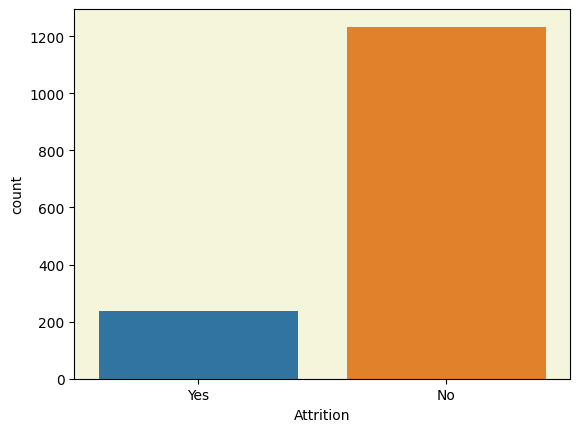

In [6]:
sns.countplot(x='Attrition', data = data)
plt.show()

#### Yes, The attrition rates seems to be oddly abit high, and we will try to investigate this. 

### Now we have to know some basics.. How many males and females in this job?

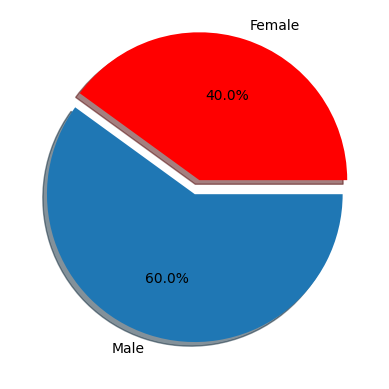

In [7]:
colors = ["#ff0000", "#1f77b4"]

group_by_diag = data.groupby("Gender").count().reset_index()
sizes = group_by_diag['EmployeeNumber']
labels = group_by_diag['Gender']

plt.pie(sizes, labels = labels, autopct='%1.1f%%', colors = colors , explode=[0.1,0], shadow=True)
plt.show()

#### We can clearly see that the majority of the employees are males, and this is the very first sign of sexism in the company.

### So, alittle rude but does it pay the same for both genders? :/

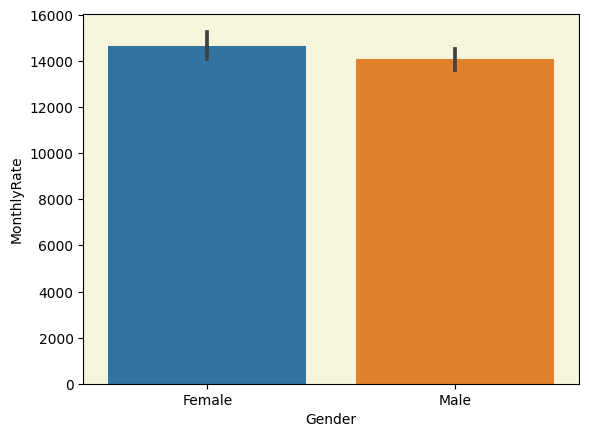

In [8]:

sns.barplot(x = 'Gender',y = 'MonthlyRate',data = data)

plt.show()


##### We can see that the pay gap is no where to be found, as the difference is very small

### but is there a relation between gender and their attrition?

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

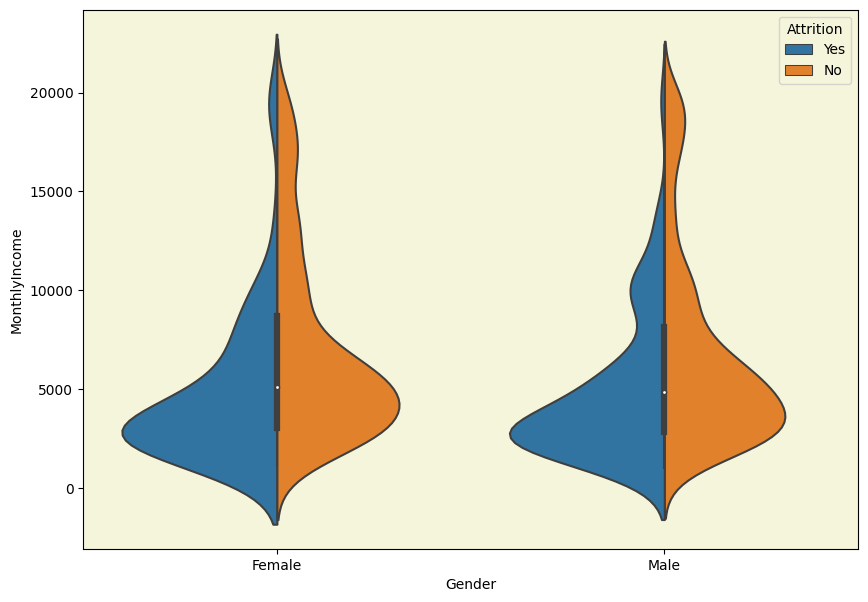

In [9]:
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=data)

### Is there a relationship between Environment Satisfaction, Gender and attrition?

<Axes: xlabel='Gender', ylabel='EnvironmentSatisfaction'>

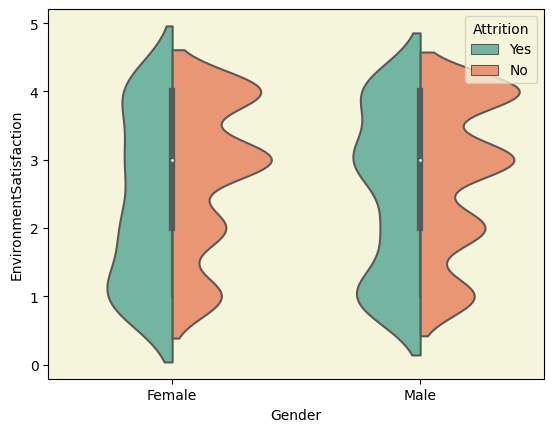

In [10]:
sns.violinplot(x='Gender', y='EnvironmentSatisfaction',hue='Attrition',split=True,palette = "Set2",data=data)

#### We found out that females with good environment are less likely to atrrition or take other oportunities, unlike males who are more likely for attrition at any kind of environment.

### We can see that at the average monthly income, the attrition seems to be the same for the both genders, but at the extreme values of monthly income, males can never quit or be fired as males in general tend to hold on to static lives as the get older, (They settle).

## How old are the employees?

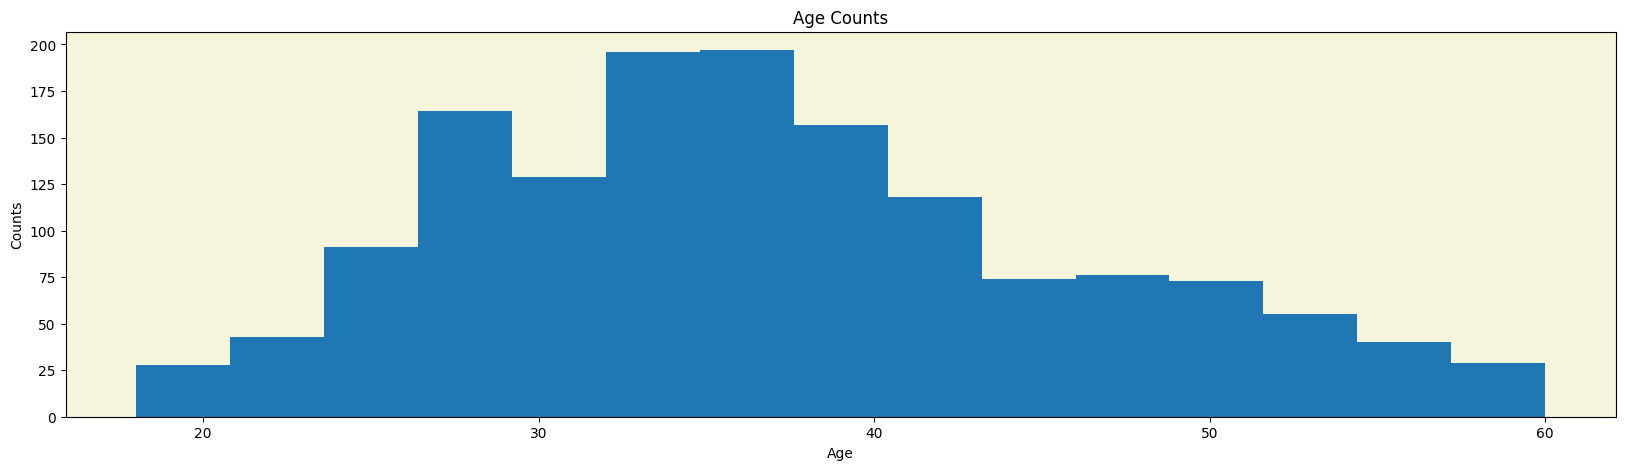

In [11]:
plt.figure(figsize=(20,5))
plt.hist(data.Age,bins=15)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()


#### We can see that the most common age of employees is around 30 - 40

#### But what is the exact most common age?

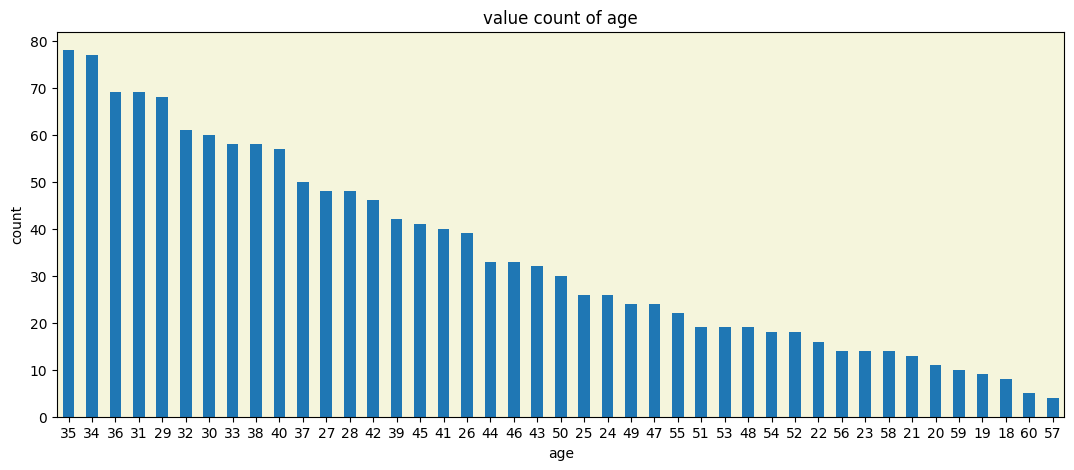

In [12]:
plt.figure(figsize=(13,5))
data.Age.value_counts().plot(kind="bar")
plt.title("value count of age")
plt.xlabel("age")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.show()

#### 35 is the most common age

## The relationship between age, monthly income and attrition

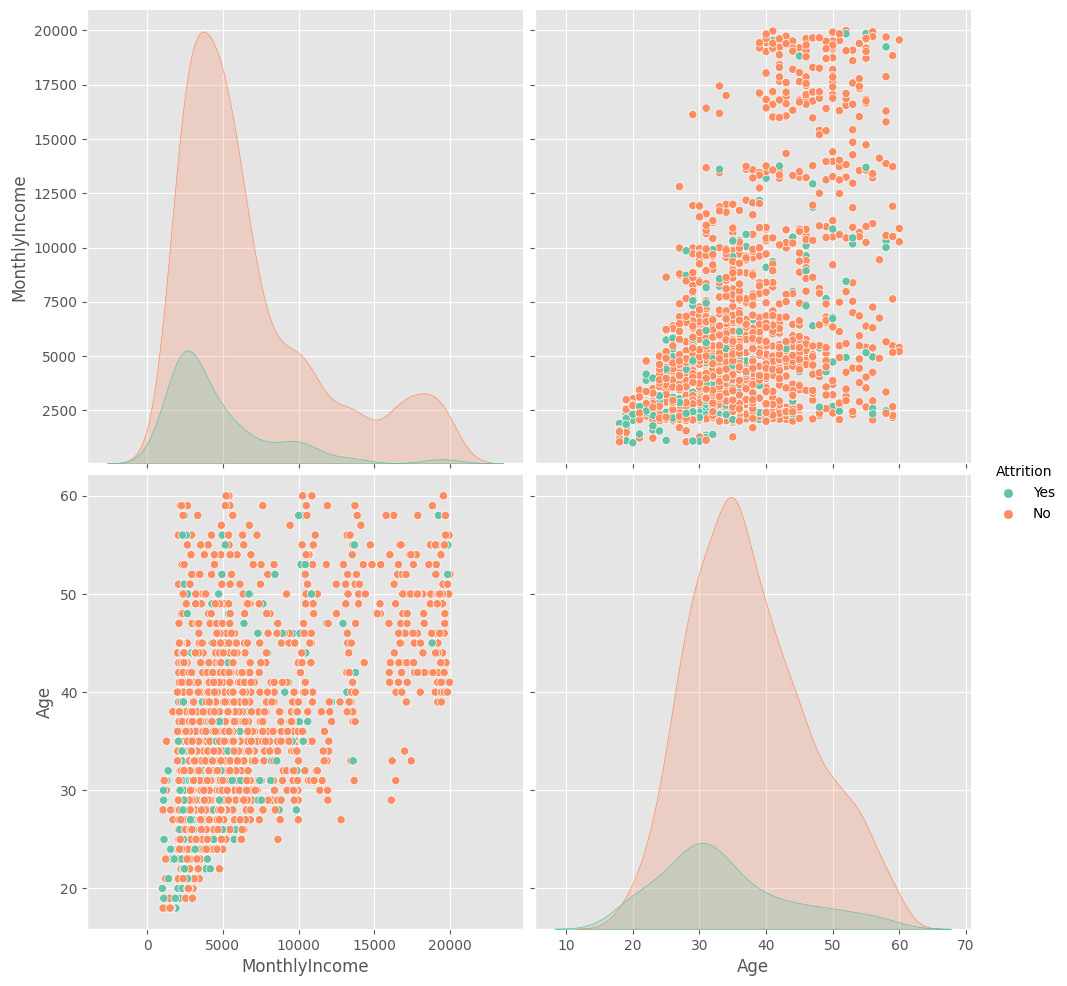

In [13]:
plt.style.use('ggplot')
g = sns.pairplot(data, vars=["MonthlyIncome", "Age"],hue="Attrition", palette = 'Set2' ,height=5)

#### Younger employees tend more to attrition as they are not attached to a stable life and have much more opportunitioes, unlike the older employees.

### Find out the distribution of employees by the education field


Text(0.5, 1.0, 'Education Field Counts')

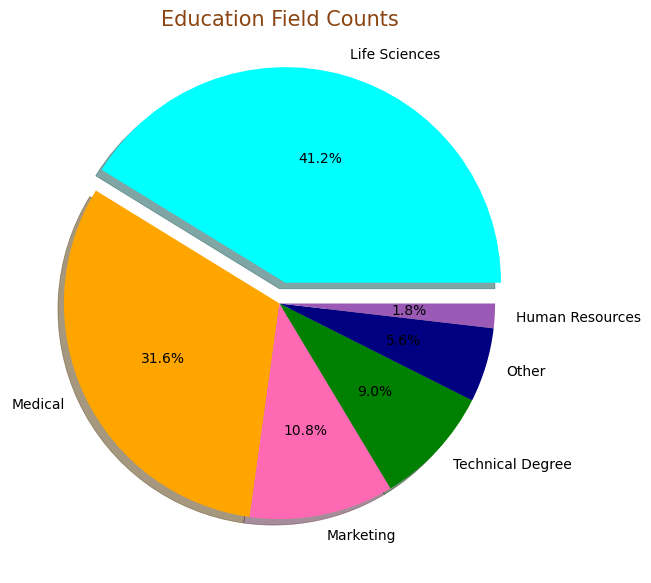

In [14]:

labels=data.EducationField.value_counts().index
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]
sizes=data.EducationField.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%", explode=[0.1,0,0,0,0,0], shadow = True)
plt.title("Education Field Counts",color="saddlebrown",fontsize=15)

### Is the education level related to attrition?

#### So the majority of employee are life science educated.

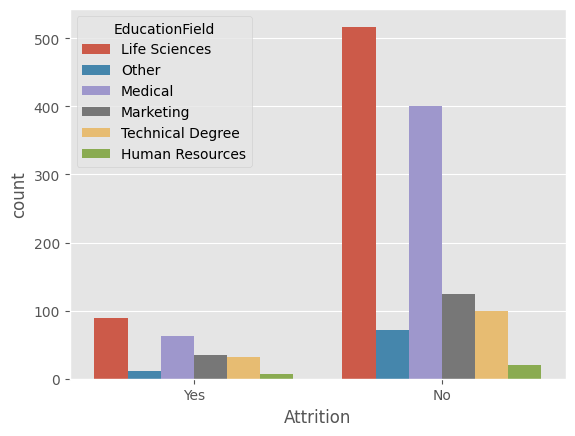

In [15]:
sns.countplot(x='Attrition', hue= 'EducationField', data = data)
plt.show()

#### We can see that employees with life science and medical degrees tend more for attrition, it could be because the higher degree level are not very attached to companies if they encountered the slightest discomfort in the workplace.

### distribution of employees in Job roles?

Text(0.5, 1.0, 'Job Role')

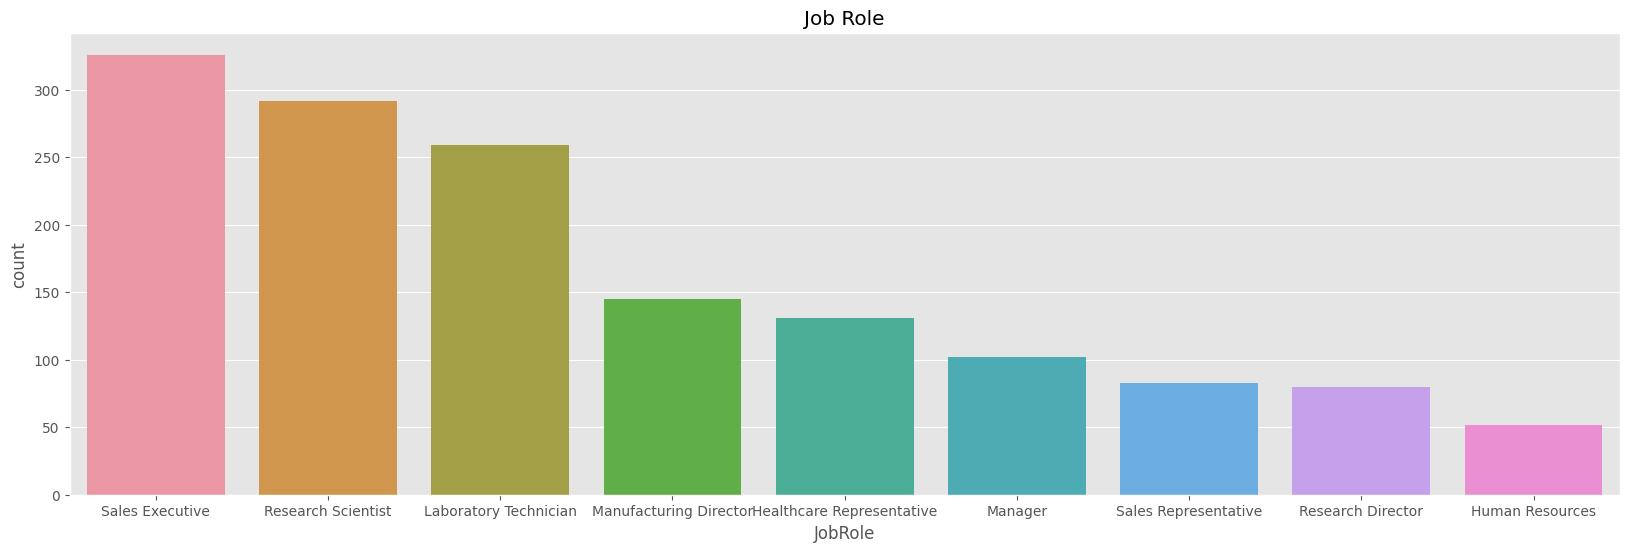

In [16]:
sns.countplot(x=data['JobRole'])
fig = plt.gcf()
fig.set_size_inches(20,6)
plt.title('Job Role')


#### The most common Job role is sales executive.

## What is the marital status for the employees?

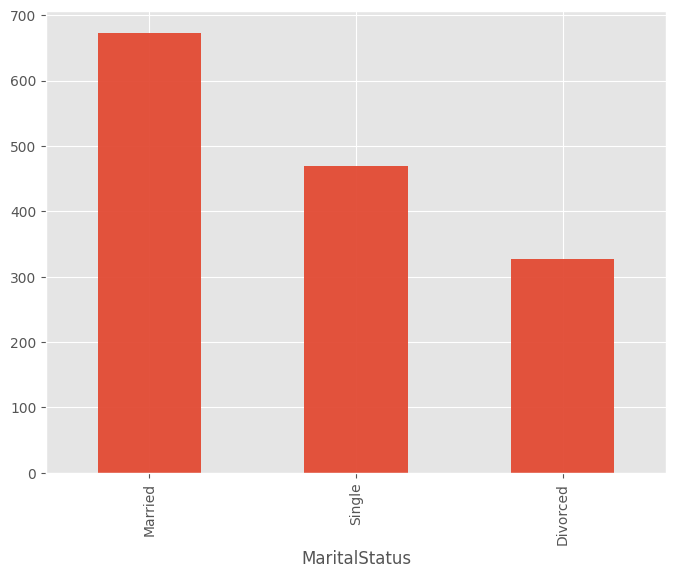

In [17]:
plt.figure(figsize=(8,6))
data.MaritalStatus.value_counts().plot(kind='bar',alpha=.95)
plt.show()

## Relationship between marital status and attrition 

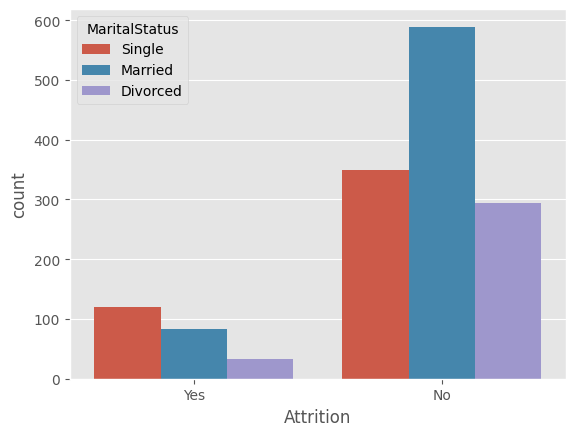

In [18]:
sns.countplot(x='Attrition', hue= 'MaritalStatus', data = data)
plt.show()

#### We can clearly see that the Singles are more likely to attrition as they don't care as much for a stable static life as the married employees.


### Is the age related to the tendency to take over time?

/fs1/eecg/shuruizgrp/tianyix2/miniconda3/envs/tangerine/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/fs1/eecg/shuruizgrp/tianyix2/miniconda3/envs/tangerine/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


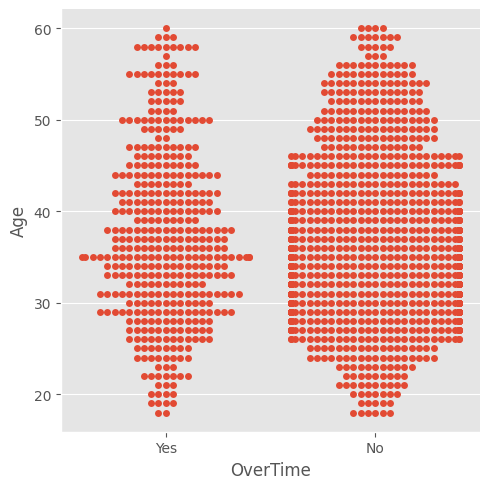

In [19]:
sns.catplot(x="OverTime", y="Age", kind="swarm",dodge = True, data=data);


#### We can see that the younger employees have more time, more energy to work overtime

### Relationship with working years and income:

<Figure size 400x200 with 0 Axes>

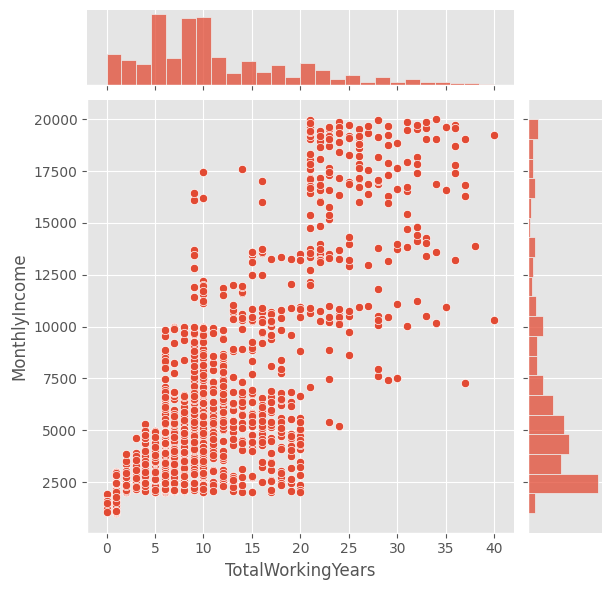

In [20]:
plt.figure(figsize=(4,2))
plt.style.use('ggplot')
sns.jointplot(x='TotalWorkingYears', y='MonthlyIncome', data=data)


#### We can see the more experinced employees have higher income.

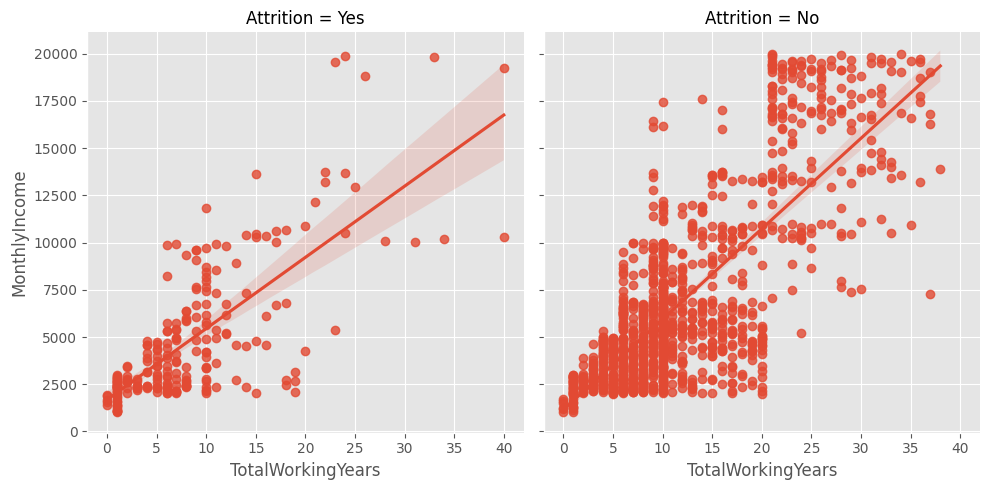

In [21]:
palette = sns.color_palette("rocket_r")
sns.lmplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = data, palette = palette, col = 'Attrition')
plt.show()

#### We can see that the employees who had more years, more experience in the company are more attached to their jobs, as they also have a higher monthly income, unlike the employees who had less total working years.

#### A heatmap for all the columns values

<Axes: >

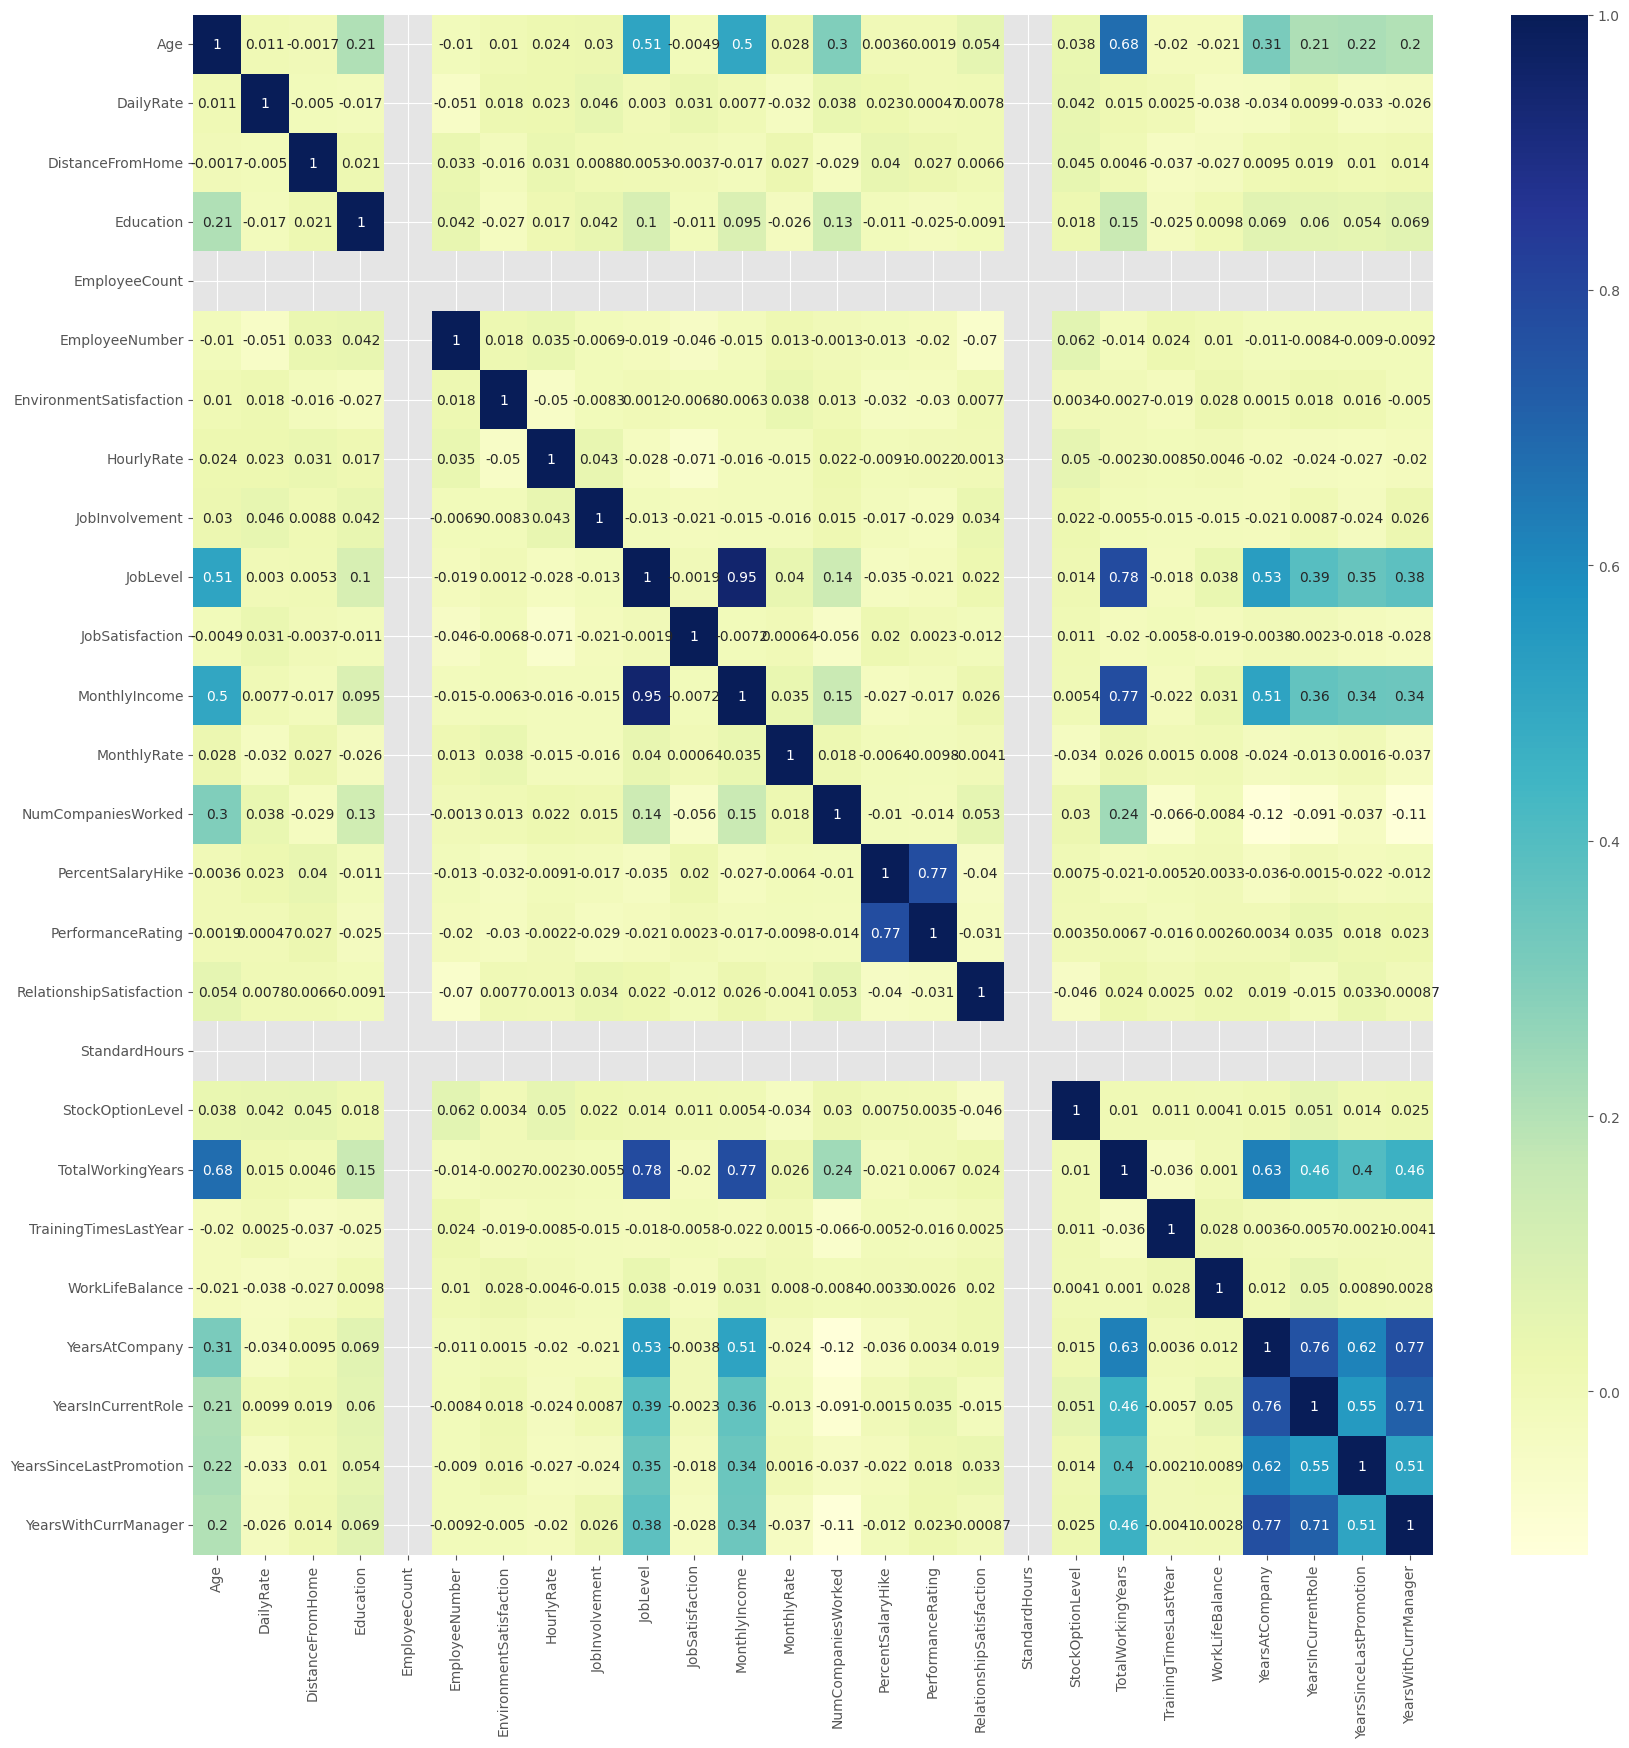

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

### Conclusion: After investigating the accusations, and the company's attrition rates and its reasons, we realized the following: 
#### 1- The company has more male employees than females, but we can't buid assumptions on this fact alone as IBM is a Tech company, and in general, females tend less to work on tech related jobs. 
#### After that we tried to understans certain columns that could have a serious relationship with attrition.
#### We looked after that for the relationship between age and attrition, and we found that younger employees tend more for attrition as they are not attached to the company and have more opportunities than older ones. 
#### And then we looked for the education level and made an assumption that the higher education level the less of attachment to poor atmospheric workplace and more tendency to attrition. 
#### Finally we searched the relationship between the marital status and attrition and found out that the single employees are more likely to attrition as they don't have a static stable life.